In [ ]:
dataset link https://www.kaggle.com/elvinagammed/chatbots-intent-recognition-dataset

In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [45]:
with open('Intent_prepro.json') as file:
#with open('intents_test.json') as file:
    data = json.load(file)
    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [46]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [47]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [62]:
# build RNN Model with tensorflow
units = 128
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units, dropout=0.2)),
    tf.keras.layers.Dense(units, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])



model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               148480    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 22)                2838      
Total params: 200,214
Trainable params: 200,214
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
5/5 [==============================] - ETA: 22s - loss: 3.0890 - accuracy: 0.187 - ETA: 0s - loss: 3.0

5/5 [==============================] - ETA: 0s - loss: 0.2992 - accuracy: 0.93 - ETA: 0s - loss: 0.1978 - accuracy: 0.96 - 0s 15ms/step - loss: 0.1978 - accuracy: 0.9650
Epoch 82/500
5/5 [==============================] - ETA: 0s - loss: 0.1607 - accuracy: 0.96 - ETA: 0s - loss: 0.3120 - accuracy: 0.88 - 0s 15ms/step - loss: 0.3120 - accuracy: 0.8881
Epoch 83/500
5/5 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.93 - ETA: 0s - loss: 0.3109 - accuracy: 0.91 - 0s 15ms/step - loss: 0.3109 - accuracy: 0.9161
Epoch 84/500
5/5 [==============================] - ETA: 0s - loss: 0.2153 - accuracy: 0.93 - ETA: 0s - loss: 0.2620 - accuracy: 0.91 - 0s 15ms/step - loss: 0.2620 - accuracy: 0.9161
Epoch 85/500
5/5 [==============================] - ETA: 0s - loss: 0.3309 - accuracy: 0.84 - ETA: 0s - loss: 0.2726 - accuracy: 0.90 - 0s 16ms/step - loss: 0.2726 - accuracy: 0.9021
Epoch 86/500
5/5 [==============================] - ETA: 0s - loss: 0.1867 - accuracy: 1.00 - ETA:

5/5 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 1.00 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - 0s 16ms/step - loss: 0.0477 - accuracy: 0.9860
Epoch 170/500
5/5 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 1.00 - ETA: 0s - loss: 0.0460 - accuracy: 0.98 - 0s 16ms/step - loss: 0.0460 - accuracy: 0.9860
Epoch 171/500
5/5 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 1.00 - ETA: 0s - loss: 0.0478 - accuracy: 0.99 - 0s 15ms/step - loss: 0.0478 - accuracy: 0.9930
Epoch 172/500
5/5 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 1.00 - ETA: 0s - loss: 0.0520 - accuracy: 0.98 - 0s 16ms/step - loss: 0.0520 - accuracy: 0.9860
Epoch 173/500
5/5 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 1.00 - ETA: 0s - loss: 0.0408 - accuracy: 0.98 - 0s 15ms/step - loss: 0.0408 - accuracy: 0.9860
Epoch 174/500
5/5 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 1.00 -

5/5 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 1.00 - ETA: 0s - loss: 0.0343 - accuracy: 0.98 - 0s 15ms/step - loss: 0.0343 - accuracy: 0.9860
Epoch 258/500
5/5 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 1.00 - ETA: 0s - loss: 0.0219 - accuracy: 1.00 - 0s 16ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 259/500
5/5 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 1.00 - ETA: 0s - loss: 0.0339 - accuracy: 0.98 - 0s 15ms/step - loss: 0.0339 - accuracy: 0.9860
Epoch 260/500
5/5 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 1.00 - ETA: 0s - loss: 0.0477 - accuracy: 0.97 - 0s 15ms/step - loss: 0.0477 - accuracy: 0.9790
Epoch 261/500
5/5 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 1.00 - ETA: 0s - loss: 0.0453 - accuracy: 0.99 - 0s 15ms/step - loss: 0.0453 - accuracy: 0.9930
Epoch 262/500
5/5 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 1.00 -

5/5 [==============================] - ETA: 0s - loss: 0.0678 - accuracy: 0.96 - ETA: 0s - loss: 0.0226 - accuracy: 0.99 - 0s 15ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 346/500
5/5 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 1.00 - ETA: 0s - loss: 0.0453 - accuracy: 0.99 - 0s 15ms/step - loss: 0.0453 - accuracy: 0.9930
Epoch 347/500
5/5 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 1.00 - ETA: 0s - loss: 0.0330 - accuracy: 0.99 - 0s 15ms/step - loss: 0.0330 - accuracy: 0.9930
Epoch 348/500
5/5 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 1.00 - ETA: 0s - loss: 0.0234 - accuracy: 1.00 - 0s 16ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 349/500
5/5 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 1.00 - ETA: 0s - loss: 0.0140 - accuracy: 1.00 - 0s 16ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 350/500
5/5 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.96 -

5/5 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.96 - ETA: 0s - loss: 0.0195 - accuracy: 0.99 - 0s 16ms/step - loss: 0.0195 - accuracy: 0.9930
Epoch 434/500
5/5 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.00 - ETA: 0s - loss: 0.0045 - accuracy: 1.00 - 0s 15ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 435/500
5/5 [==============================] - ETA: 0s - loss: 0.0769 - accuracy: 0.96 - ETA: 0s - loss: 0.0195 - accuracy: 0.99 - 0s 15ms/step - loss: 0.0195 - accuracy: 0.9930
Epoch 436/500
5/5 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.96 - ETA: 0s - loss: 0.0175 - accuracy: 0.98 - 0s 15ms/step - loss: 0.0175 - accuracy: 0.9860
Epoch 437/500
5/5 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 1.00 - ETA: 0s - loss: 0.0246 - accuracy: 0.98 - 0s 15ms/step - loss: 0.0246 - accuracy: 0.9860
Epoch 438/500
5/5 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.00 -

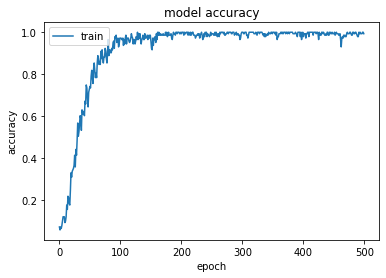

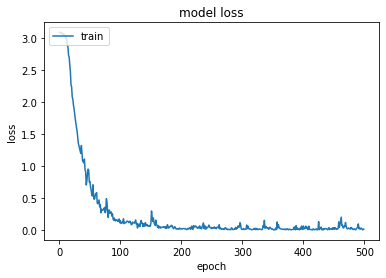

In [63]:
import matplotlib.pyplot as plt
# Plot accuracy history 
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./accuracy.png', dpi=100)

plt.show()


# Plot loss history 
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./loss.png', dpi=100)
plt.show()

In [64]:
# to save the trained model
model.save("chat_model_3")

import pickle

# to save the fitted tokenizer
with open('tokenizer_3.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder_3.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model_3\assets


INFO:tensorflow:Assets written to: chat_model_3\assets


# INFERENCE

In [65]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("New_folder/archive/Intent_prepro.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model_3/')

    # load tokenizer object
    with open('tokenizer_3.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder_3.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: hello
ChatBot: Hi human, please tell me your GeniSys user
User: Bella
ChatBot: Good! Hi <HUMAN>, how can I help you?
User: tell me a joke
ChatBot: An old man takes his two grandchildren to see the new Scooby-Doo film. When he returns home, his wife asks if he enjoyed himself. 'Well', he starts, 'if it wasn't for those pesky kids...!'
User: open the pod bay door
ChatBot: Iâ€™m sorry, Iâ€™m afraid I canâ€™t do that!
User: why
ChatBot: It is classified, I could tell you but I would have to kill you!
User: okay, any gossip
ChatBot: Dark_age said I tried to understand because I did not get it right this time ether.
User: bye
ChatBot: Bye! Come back again soon.
User: quit
